In [1]:
import pandas as pd
import os

In [2]:
A = os.listdir('./CSV/')
B = os.listdir('./PM1/')

In [3]:
for J in :
    J.ID, J.Start_Time

SyntaxError: invalid syntax (Temp/ipykernel_8844/1631421186.py, line 1)

In [4]:
xt = pd.read_csv('SF_good.csv')
def func(v):
    s = str(v).split(' ')[1].split(':')
    s = (int(s[0])*60+int(s[1]))//5
    return s
import numpy as np
ID2START = dict(zip(xt.ID.values, xt.Start_Time.apply(lambda v: np.clip(func(v),0,287)).values))
ID2END = dict(zip(xt.ID.values, xt.End_Time.apply(lambda v: np.clip(func(v),0,287)).values))

./CSV/A-1223.csv


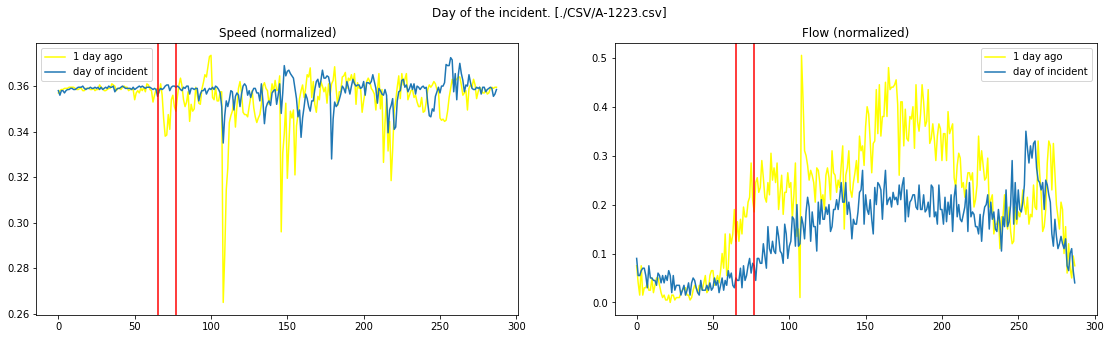

In [5]:
def getSF(F):
    dt = pd.read_csv(F,sep='\t')
    
    SF=None
    
    if 'Lane 2 Speed (mph)' in dt.columns:
        
        S = (dt['Lane 1 Speed (mph)']+dt['Lane 2 Speed (mph)'])/2
        F = (dt['Lane 1 Flow (Veh/5 Minutes)']+dt['Lane 2 Flow (Veh/5 Minutes)'])/2
    elif 'Lane 1 Speed (mph)' in dt.columns:
        
        S = dt['Lane 1 Speed (mph)']
        F = dt['Lane 1 Flow (Veh/5 Minutes)']

#         print(F.max())
        S = S/85.25
        F = F/224.5
        import numpy as np
        SF = np.concatenate([S.values.reshape(-1,1),F.values.reshape(-1,1)],axis=0).ravel()
    return SF

import matplotlib.pyplot as plt
for i in range(len(xt)):
    idx = xt.iloc[i].ID
    fp = './CSV/'+idx+'.csv'
    print(fp)
    sf = getSF(fp)
    
    prevfp = './PM7/'+idx+'.csv'
    prevsf = getSF(prevfp)
    
    dayfp = './PM1/'+idx+'.csv'
    daysf = getSF(dayfp)
   
    fig, axs = plt.subplots(1,2,figsize=(19,5))
    fig.suptitle('Day of the incident. ['+fp+']')
#     axs[0].plot(prevsf[:288],c='silver',label='7 days ago')
    axs[0].plot(daysf[:288],c='yellow',label='1 day ago')
    axs[0].plot(sf[:288],label='day of incident')
    axs[0].set_title('Speed (normalized)')
    axs[0].legend()
    
    axs[0].axvline(ID2START[idx],c='r')
    axs[0].axvline(ID2END[idx],c='r')
    
    
#     axs[1].plot(prevsf[288:],c='silver',label='7 days ago')
    axs[1].plot(daysf[288:],c='yellow',label='1 day ago')
    axs[1].plot(sf[288:],label='day of incident')
    axs[1].set_title('Flow (normalized)')
    axs[1].legend()
    
    axs[1].axvline(ID2START[idx],c='r')
    axs[1].axvline(ID2END[idx],c='r')
    plt.savefig('csv-'+idx+'.png')
#     plt.plot(sf[:288])
    break

./CSV/A-1390.csv
./CSV/A-1978.csv
./CSV/A-4490.csv
./CSV/A-4798.csv
./CSV/A-5764.csv
./CSV/A-7102.csv
./CSV/A-13096.csv
./CSV/A-18159.csv
./CSV/A-18859.csv
./CSV/A-33544.csv
./CSV/A-34584.csv
./CSV/A-34676.csv
./CSV/A-35063.csv


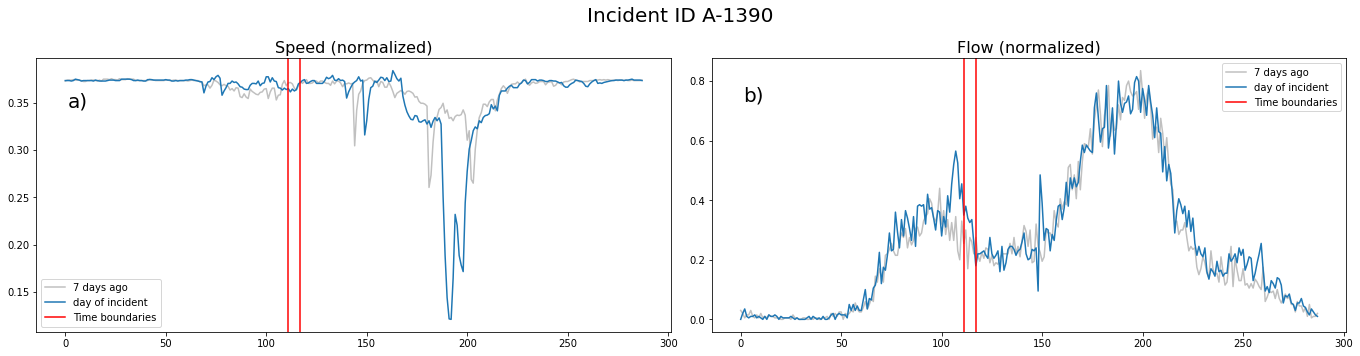

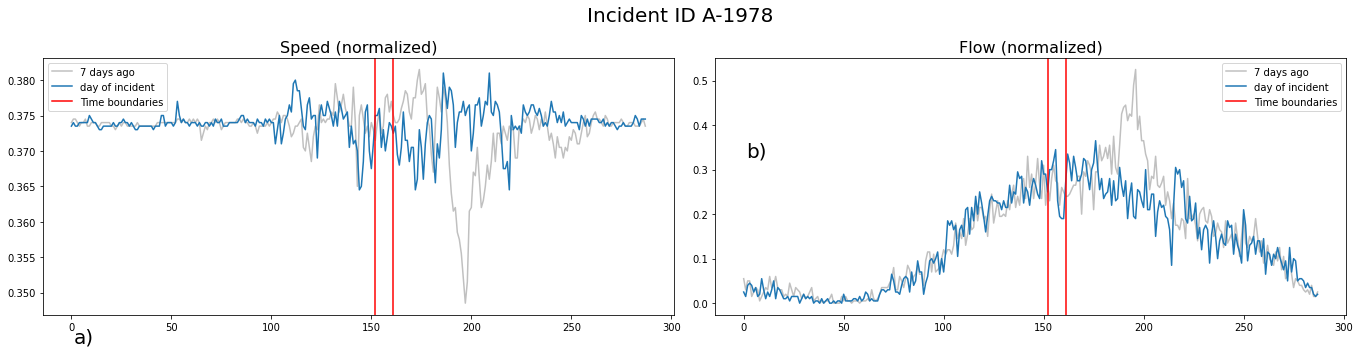

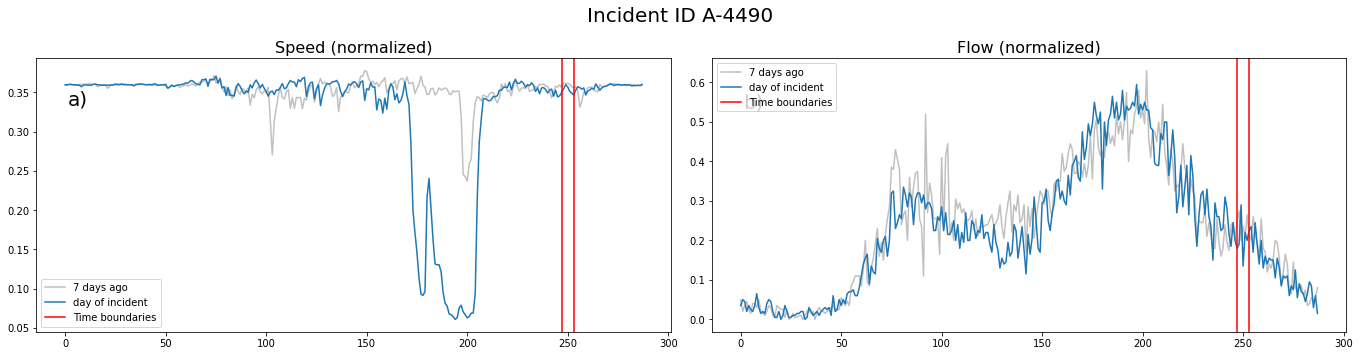

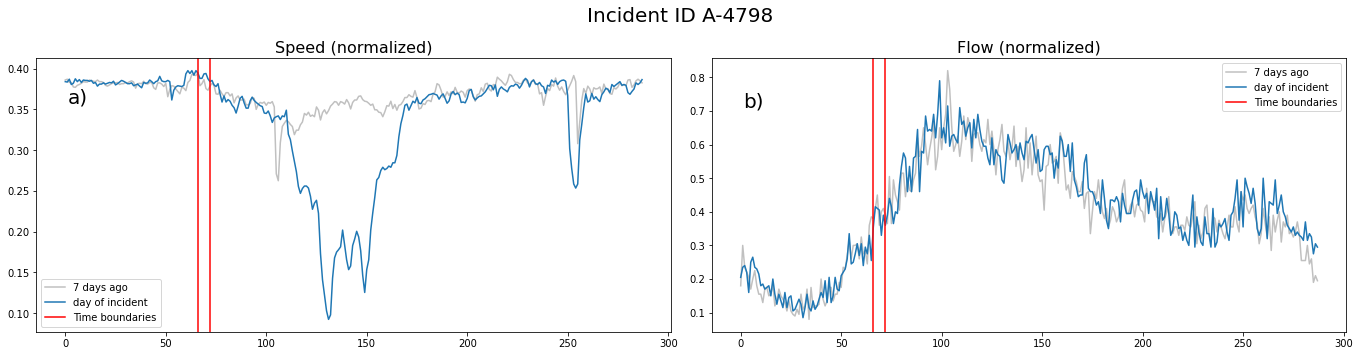

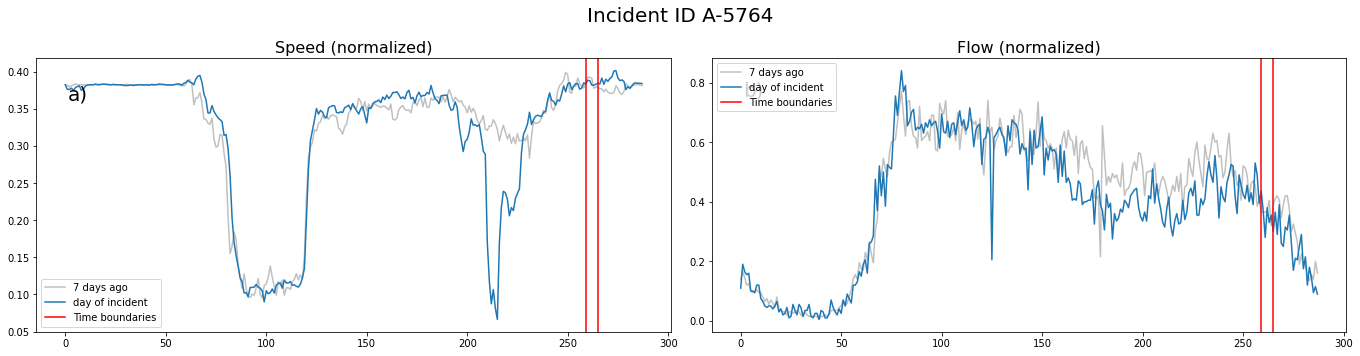

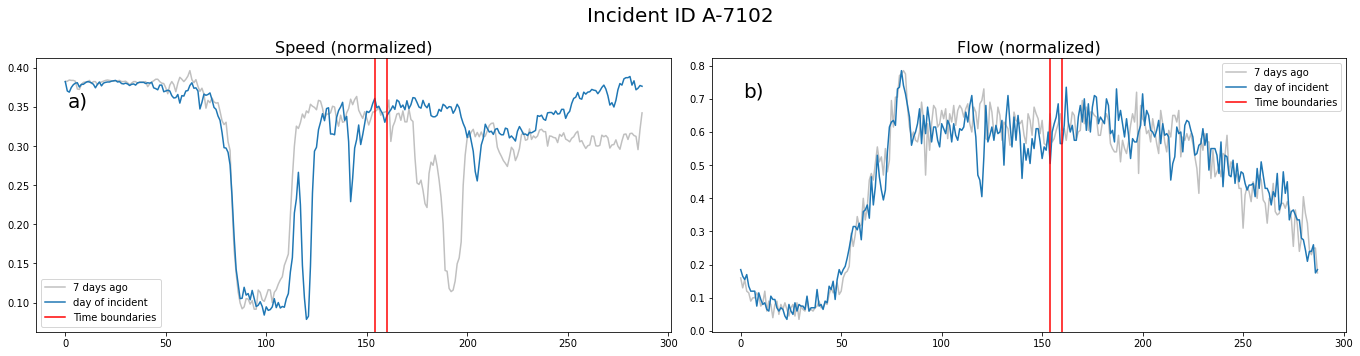

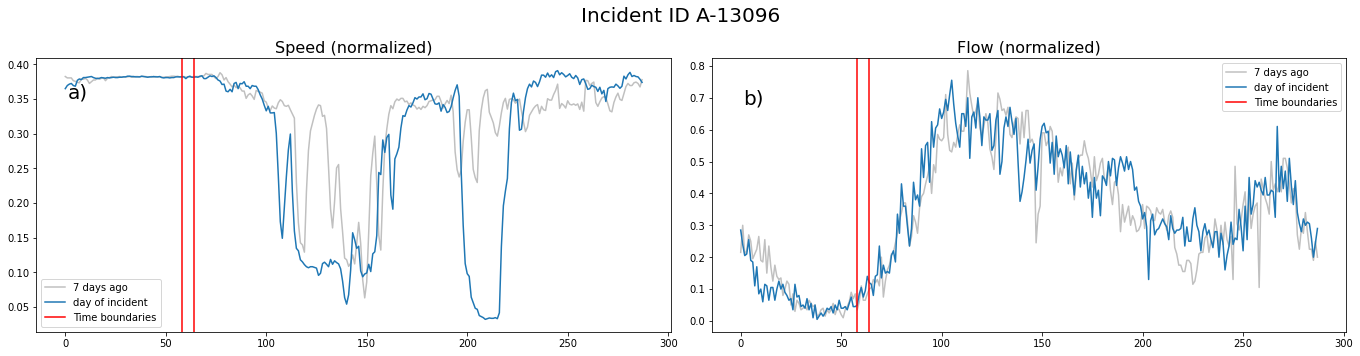

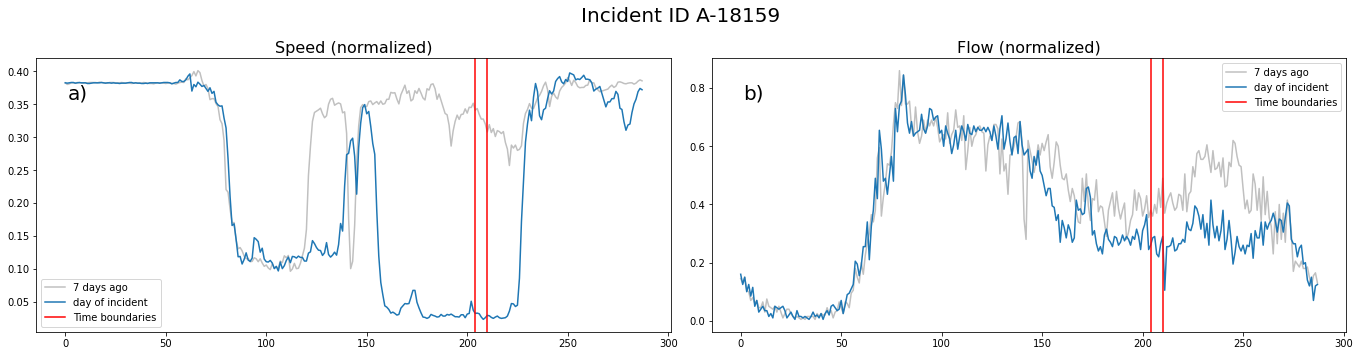

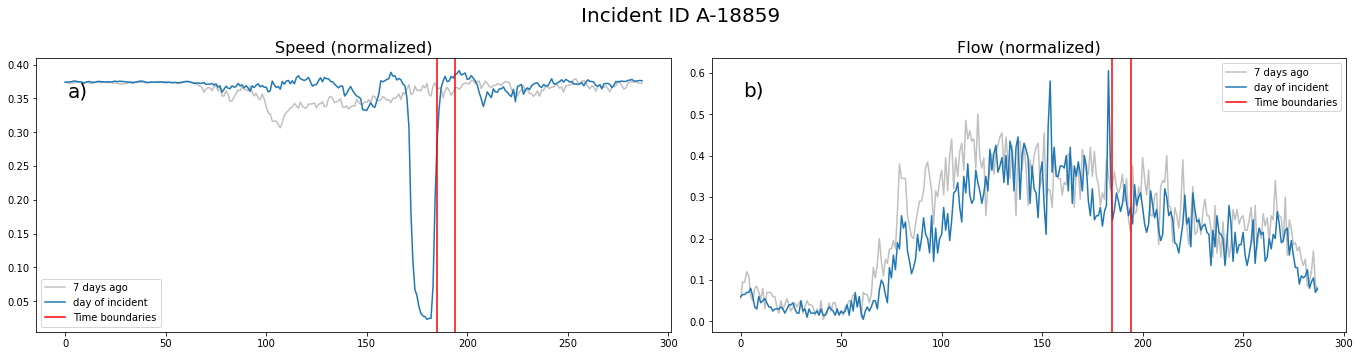

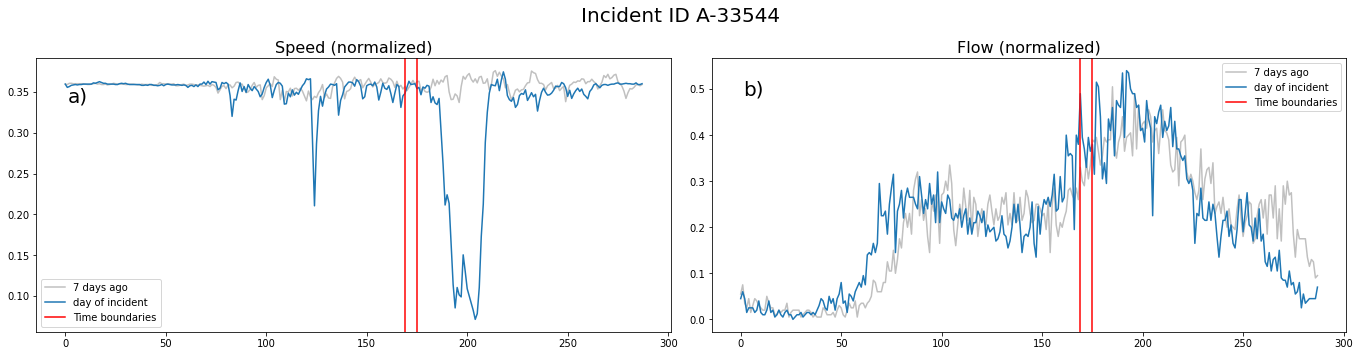

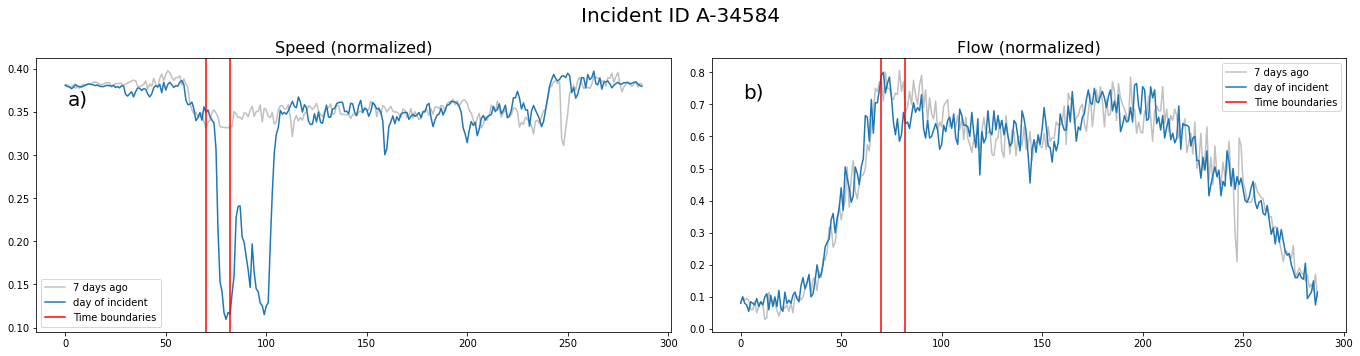

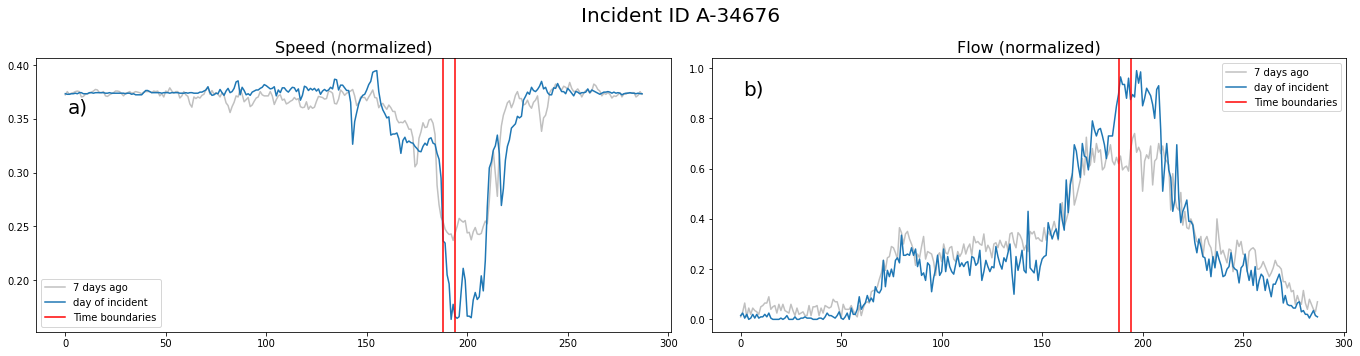

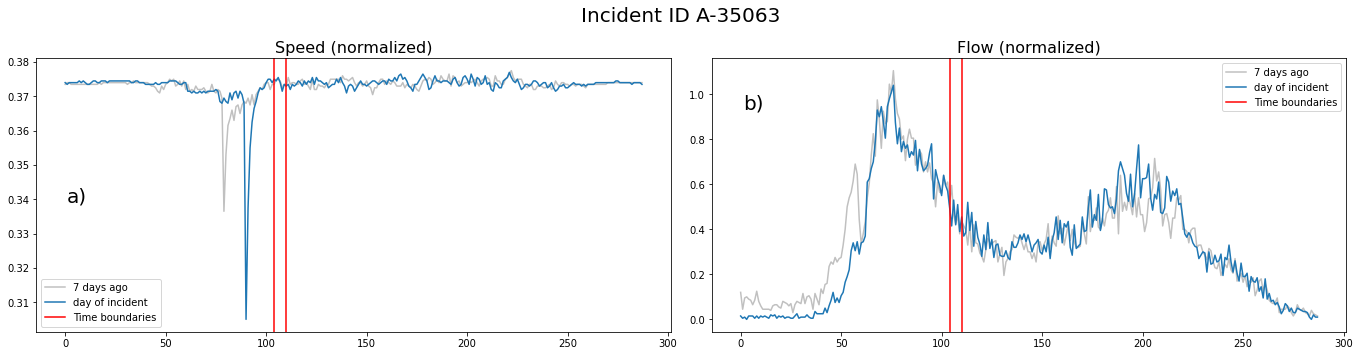

In [40]:
def getSF(F):
    dt = pd.read_csv(F,sep='\t')
    
    SF=None
    
    if 'Lane 2 Speed (mph)' in dt.columns:
        
        S = (dt['Lane 1 Speed (mph)']+dt['Lane 2 Speed (mph)'])/2
        F = (dt['Lane 1 Flow (Veh/5 Minutes)']+dt['Lane 2 Flow (Veh/5 Minutes)'])/2
    elif 'Lane 1 Speed (mph)' in dt.columns:
        
        S = dt['Lane 1 Speed (mph)']
        F = dt['Lane 1 Flow (Veh/5 Minutes)']

#         print(F.max())
        S = S/200
        F = F/200
        import numpy as np
        SF = np.concatenate([S.values.reshape(-1,1),F.values.reshape(-1,1)],axis=0).ravel()
    return SF

import matplotlib.pyplot as plt
for idx in ["A-1390","A-1978","A-4490","A-4798","A-5764","A-7102","A-13096","A-18159","A-18859","A-33544",
            "A-34584","A-34676","A-35063"]:
#     idx = xt.iloc[i].ID
    fp = './CSV/'+idx+'.csv'
    print(fp)
    sf = getSF(fp)
    
    prevfp = './PM7/'+idx+'.csv'
    prevsf = getSF(prevfp)
    
    dayfp = './PM1/'+idx+'.csv'
    daysf = getSF(dayfp)
   
    fig, axs = plt.subplots(1,2,figsize=(19,5))
    fig.suptitle('Incident ID '+idx,fontsize=20)
    axs[0].plot(prevsf[:288],c='silver',label='7 days ago')
#     axs[0].plot(daysf[:288],c='yellow',label='1 day ago')
    axs[0].plot(sf[:288],label='day of incident')
    axs[0].set_title('Speed (normalized)',fontsize=16)
    
    
    axs[0].axvline(ID2START[idx],c='r',label="Time boundaries")
    axs[0].axvline(ID2END[idx],c='r')
    axs[0].text(1,sf[:288].max()*0.9,"a)",fontsize=20)
    axs[0].legend()
    
    
    axs[1].plot(prevsf[288:],c='silver',label='7 days ago')
#     axs[1].plot(daysf[288:],c='yellow',label='1 day ago')
    axs[1].plot(sf[288:],label='day of incident')
    axs[1].set_title('Flow (normalized)',fontsize=16)
#     axs[1].legend()
    
    axs[1].axvline(ID2START[idx],c='r',label="Time boundaries")
    axs[1].axvline(ID2END[idx],c='r')
    axs[1].legend()
    plt.text(1,sf[288:].max()*0.9,"b)",fontsize=20)
    plt.tight_layout()
    plt.savefig(idx+'.pdf')
#     plt.plot(sf[:288])
#     break

In [49]:
import numpy as np
import matplotlib.pyplot as plt
def getSF(F):
    dt = pd.read_csv(F,sep='\t')
    
    SF=None
    
    if 'Lane 1 Speed (mph)' in dt.columns:
        
        S = dt['Lane 1 Speed (mph)']
        F = dt['Lane 1 Flow (Veh/5 Minutes)']

#         print(F.max())
        S = S/200
        F = F/200
        import numpy as np
        SF = np.concatenate([S.values.reshape(-1,1),F.values.reshape(-1,1)],axis=0).ravel()
    return SF




for F in DETS[10:]:
    A = getSF('./CSV/'+F)
    B = getSF('./PM1/'+F)
#     print(len(A),len(B))
    FULL = np.concatenate([B[288:],A[288:]],axis=0)
    END = ID2NUM[F.replace('.csv','')]
    START = 288+END-288
    H24 = FULL[START:END+288]
    print(len(H24))
    break

288
